In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from model.dataset import DataSet
path = '/home/demo/anchormen/emotion-rec/data/aligned'

Using TensorFlow backend.


KeyboardInterrupt: 

In [2]:
def load(idx, display=False):
    df = pd.read_csv(path + '/fold_frontal_{}_data.txt'.format(idx), sep='\t').dropna()
    df = df[df['gender'] != 'u']

    images = []
    labels = []

    for i, row in df.iterrows():
        print("Image index:", i)

        path = os.path.join(base_path, row['user_id'], 'landmark_aligned_face.{}.{}'.format(
            row['face_id'], row['original_image']
        ))
        gender = row['gender']
        if not os.path.exists(path):
            continue

        images.append(misc.imresize(misc.imread(path), (256, 256)))
        labels.append(np.asarray([1, 0], dtype='float') if gender == 'm' else np.asarray([0, 1], dtype='float'))

        if display and i % 100 == 0:
            plt.imshow(misc.imread(path))
            plt.title("man" if gender == 'm' else 'woman')
            plt.show()

    images = np.asarray(images)
    labels = np.asarray(labels)

    return images, labels

im0, lab0 = load(0)

NameError: name 'pd' is not defined

In [3]:
df = pd.read_csv(path, delimiter=',')

In [4]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [5]:
df['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [6]:
df['emotion'].unique()

array([0, 2, 4, 6, 3, 5, 1])

In [7]:
counts = df[df['Usage'] == 'Training'].groupby('emotion').count()

In [68]:
counts

,pixels,Usage
emotion,,
0,3995,3995
1,436,436
2,4097,4097
3,7215,7215
4,4830,4830
5,3171,3171
6,4965,4965


In [8]:
total = counts['Usage'].sum()

In [67]:
np.log(total / counts)['Usage']

emotion
0    1.972167
1    4.187324
2    1.946956
3    1.381048
4    1.782364
5    2.203164
6    1.754797
Name: Usage, dtype: float64

In [9]:
df_train = df[df['Usage'] == 'Training']
df_test = df[df['Usage'] == 'PrivateTest']

In [10]:
def to_labels_and_images(df):
    labels = df['emotion']
    images = []
    for _, row in df.iterrows():
        images.append(row['pixels'].split())
    return np.asarray(images, dtype='float32'), labels

In [11]:
train_x, train_y = to_labels_and_images(df_train)
test_x, test_y = to_labels_and_images(df_test)

In [6]:
print(train_x[0].max(), train_x[0].min())

210.0 11.0


In [17]:
train_x.max()

255.0

In [21]:
ds_train = DataSet(train_x, train_y, 7)
ds_test = DataSet(train_x, train_y, 7)

In [55]:
import pickle

pickle.dump((train_x, train_y, test_x, test_y), open('/home/demo/anchormen/emotion-rec/data/preprocessed.p', 'wb'))

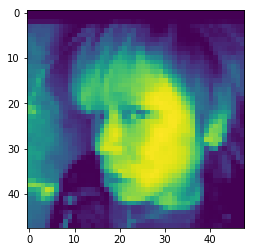

In [50]:
plt.imshow(train_x[89].reshape((48, 48)))